In [21]:
import json
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
import pandas as pd
import pickle



%matplotlib inline

### Getting a network from user.json

In [83]:
c = 0
friend_list = {}
with open('yelp_academic_dataset_user.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        uid = review['user_id']
        friends = review['friends']
        #only get nodes with friends (don't want unconnected nodes of degree 0)
        if len(friends)!=0:
            friend_list[uid]=friends
        if c % 100000 == 0:
            print c

100000
200000
300000
400000
500000


In [86]:
network = nx.Graph(friend_list)

In [87]:
print 'hi'

hi


In [ ]:
print(nx.diameter(network))

In [76]:
print "Number of nodes in the graph: ", network.number_of_nodes() 
print "Number of edges in the graph: ", network.number_of_edges() 

# Number of nodes in the graph:  552339
# Number of edges in the graph:  1781932

Number of nodes in the graph:  249441
Number of edges in the graph:  1781932


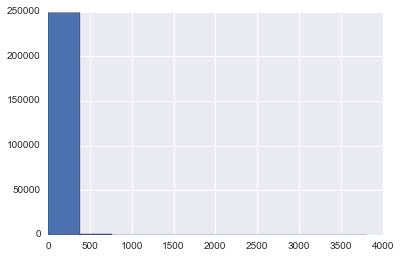

In [77]:
degree_sequence=sorted(nx.degree(network).values()) 
dmax= max(degree_sequence)
h,bins,patches = plt.hist(degree_sequence)

In [79]:
print dmax

3812


In [80]:
print type(degree_sequence)

<type 'list'>


In [81]:
print len(degree_sequence)

249441


In [66]:
print degree_sequence[-500000]

13


In [70]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

x = remove_values_from_list(degree_sequence, 0)
print len(x)

249441


In [71]:
print x[-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Getting a network from review.json

In [44]:
c = 0
user_list = defaultdict(list)
business_list = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        uid = review['user_id']
        bid =  review['business_id']
        user_list[uid].append(bid)
        business_list[bid].append(uid)


        if c % 1000 == 0:
            print c
            break
# print user_list
# print business_list

1000


In [45]:
print len(user_list), len(business_list)

740 68


In [46]:
friends_list = {}


for user in user_list:
    for business in user_list[user]:
        if user in friends_list.keys():
            friends_list[user].extend(business_list[business])
        else:
            friends_list[user]=business_list[business]
        

In [47]:

sys.getsizeof(friends_list)

#3146000
#49424


49424

In [48]:
print len(friends_list)

740


In [49]:
review_network = nx.Graph(friends_list)

In [50]:
len(review_network)

740

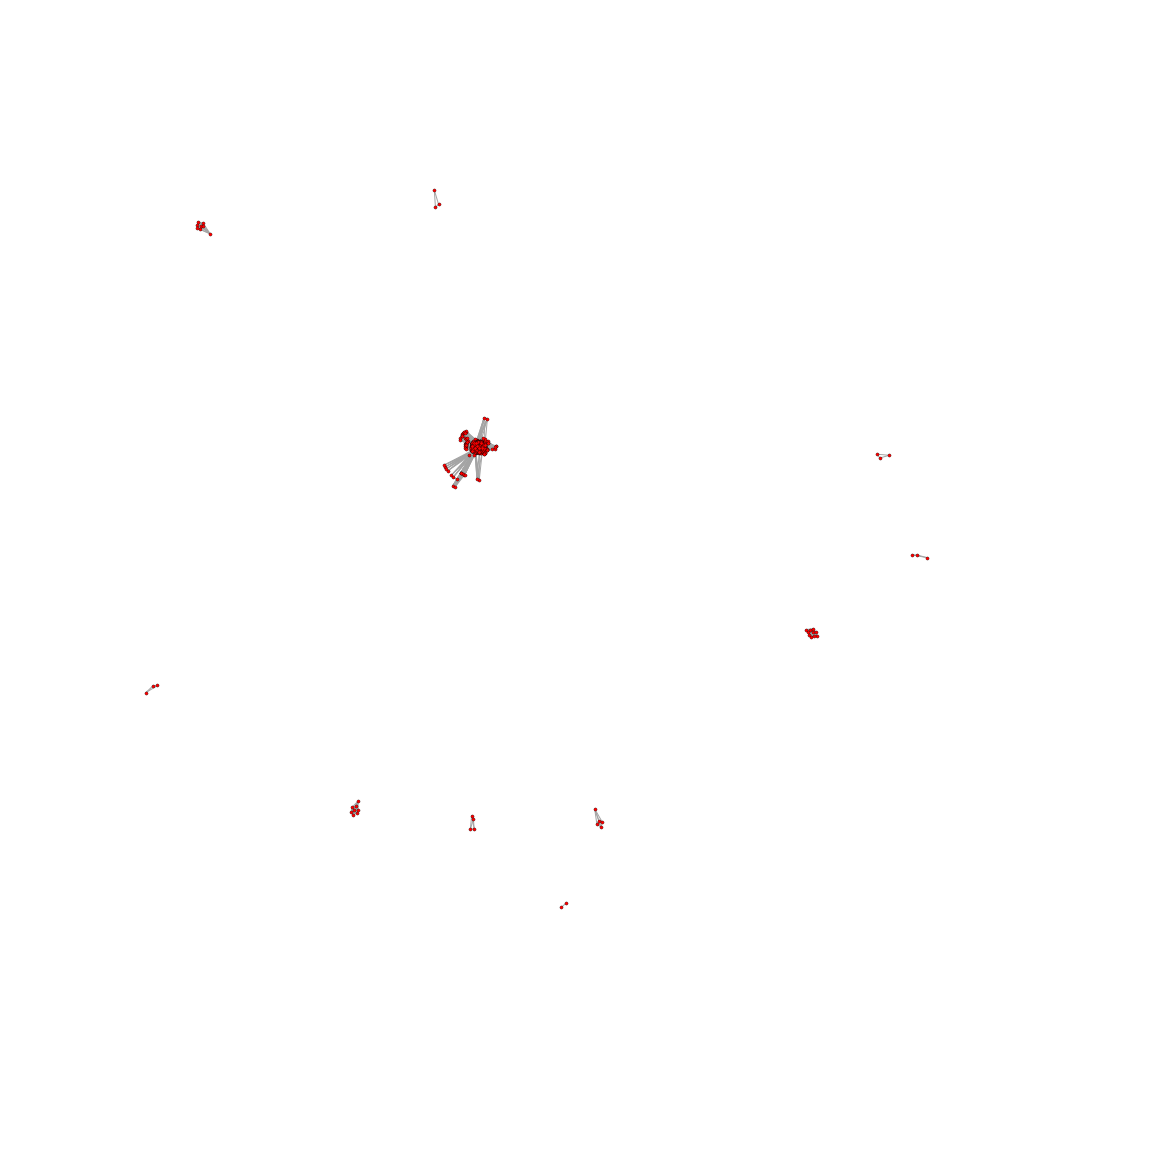

In [51]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(20,20))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', with_labels=False, font_color='#cacaca', node_size=10)
    plt.axis('off')


### Creating a network graph for PA

In [4]:
PA_df = pd.read_csv(open('PA_business.csv', 'r'))

In [6]:
type(PA_df)

pandas.core.frame.DataFrame

In [7]:
PA_businesses = PA_df.BusinessId.tolist()

In [8]:
print len(PA_businesses), type(PA_businesses)

3754 <type 'list'>


In [9]:
print PA_businesses[:10]

['5UmKMjUEUNdYWqANhGckJw', 'UsFtqoBl7naz8AVUBZMjQQ', '3eu6MEFlq2Dg7bQh8QbdOg', 'cE27W9VPgO88Qxe4ol6y_g', 'HZdLhv6COCleJMo7nPl-RA', 'mVHrayjG3uZ_RLHkLj-AMg', 'VHYT1qgQw5JvXAlUDhTArA', 'KayYbHCt-RkbGcPdGOThNg', 'b12U9TFESStdy7CsTtcOeg', 'Sktj1eHQFuVa-M4bgnEh8g']


In [12]:
c = 0
user_list = defaultdict(list)
business_list = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        bid =  review['business_id']
        if (bid in PA_businesses):
            uid = review['user_id']
            user_list[uid].append(bid)
            business_list[bid].append(uid)


        if c % 100000 == 0:
            print c
# print user_list
# print business_list

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000


In [13]:
print len(user_list), len(business_list)

26250 3751


In [ ]:
friends_list = {}


for user in user_list:
    for business in user_list[user]:
        if user in friends_list.keys():
            friends_list[user].extend(business_list[business])
        else:
            friends_list[user]=business_list[business]
        

### Getting network graph for ON

In [2]:
ON_df = pd.read_csv(open('ON_business.csv', 'r'))

In [3]:
ON_businesses = ON_df.BusinessId.tolist()

In [4]:
print len(ON_businesses)

474


In [5]:
c = 0
user_dic = defaultdict(list)
business_dic = defaultdict(list)
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        bid =  review['business_id']
        if (bid in ON_businesses):
            uid = review['user_id']
            user_dic[uid].append(bid)
            business_dic[bid].append(uid)


        if c % 400000 == 0:
            print c
# print user_list
# print business_list

400000
800000
1200000
1600000
2000000


In [6]:
print len(user_dic), len(business_dic)

1804 474


In [7]:
friends_list = {}

for user in user_dic:
    for business in user_dic[user]:
        if user in friends_list.keys():
            friends_list[user].extend(business_dic[business])
        else:
            friends_list[user]=business_dic[business]
        

In [8]:
print friends_list[business_dic[ON_businesses[0]][50]]

[u'mH0V1sFK59U3KSuX0t4_cA', u'qrTcshwswH_D3OdcLKHnnw', u'LMDFUGcHyXIt3FKwxdyoCg', u'YUt5JRNgcugiRTwDu2gv_A', u'7Qa7Zd3e3SXh_CbgfQ1dgA', u'gdrWAtzsNUvRho7Y5K52Sw', u'mHzu3NUIx9ubj-5_2_XX9Q', u'WmyTFleiftp-ORtVOa91qg', u'GTi9WW9kf_2Iz2ooI_ZcfQ', u'diaKsr6s50RmSMz8M8OYbA', u'diaKsr6s50RmSMz8M8OYbA', u'7-9EVVgoDM5OYx9qN5SNUQ', u'bpt8aaamzEe09UxWSrcUVQ', u'LMDFUGcHyXIt3FKwxdyoCg', u'E-9iemyXGJXwdlRDRy_tYQ', u'X_-0GKEoPcE-dbWE38RlUA', u'V7y2Px-Njt3FfXem9JPcxg', u'QZ_d-N8JFBDJUsg_JkaYxg', u'NQNtvb1HkixnRXP1eA2LnQ', u'nGF4BEXiMzsPeDUJnxM5Yg', u'I36DPizh-IEe1esjzAarlg', u'XmeBajP9Dcj4EYevPHn-Dg', u'nChfTUqhSDEVRfRG3Ec-uQ', u'nkNazyvqiaJsvoq9h1KfTw', u'lAvcGW3kKVa4YkLQ5_BfRQ', u'2EqdisOw0Mz1BhZvX-00EQ', u'NxQFNHAlGL0TOyIVaqVxSA', u'BWh0IBATln92LhFyOqIHcg', u'gcb3BZtzBt-CI6FYaRR2dg', u'jyMduBqWVhTAQmKMMdNN4g', u'osBLWPQAAtVJyiWqE7bqfA', u'3ImugoeyTuJ7v3foDVYHsg', u'Aeg_dEKXGPEnYI-BwSu1fA', u'KqRI13MRE07h5bK4brrPTg', u'xUB4eXJTX-BJB4eCaQ2nbg', u'2MbjfBsKQNzC0y6yEOx3eA', u'RmBakAtBbIKYpZGlTbuDpw', 

In [9]:
import time

t1 = time.time()

review_network = nx.Graph(friends_list)

print time.time()-t1

92.3229999542


In [10]:
review_network.number_of_edges()

614887

In [11]:
review_network.number_of_nodes()

1804

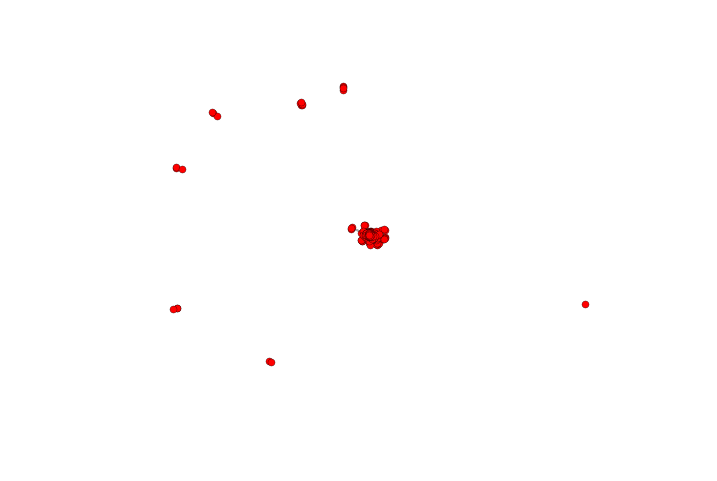

In [12]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

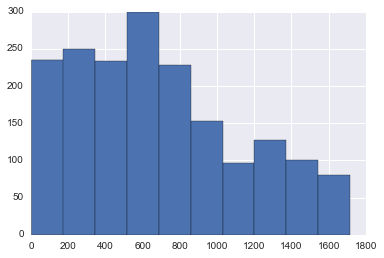

In [13]:
degree_sequence=sorted(nx.degree(review_network).values()) 
dmax= max(degree_sequence)
h,bins,patches = plt.hist(degree_sequence)

In [14]:
print degree_sequence[:140]

[2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 14, 14, 15, 15, 17, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 24, 26, 26, 27, 30, 30, 30, 30, 33, 34, 35, 35, 35, 35, 39, 41, 46, 46, 46, 46, 46, 46, 48, 48, 48, 48, 50, 54, 55, 55, 58, 58, 58, 61, 61, 62, 62, 68, 69, 69, 69, 71, 72, 72, 73, 74, 74, 75, 75, 76, 76, 77, 81, 82, 85, 85, 86, 86, 86, 87, 87, 87, 90, 90, 91, 91, 91, 93, 93, 93, 93, 94, 98, 98, 99, 99, 99, 99, 99]


In [15]:
degrees = review_network.degree()

In [16]:
print type(degrees)

<type 'dict'>


In [17]:
print "Number of nodes in the graph: ", review_network.number_of_nodes() 
print "Number of edges in the graph: ", review_network.number_of_edges() 

Number of nodes in the graph:  1804
Number of edges in the graph:  614887


In [18]:
c = 0
for node in degrees.keys():
    if degrees[node] < 100:
        review_network.remove_node(node)
        c+=1
print c

140


In [19]:
print "Number of nodes in the graph: ", review_network.number_of_nodes() 
print "Number of edges in the graph: ", review_network.number_of_edges() 

Number of nodes in the graph:  1664
Number of edges in the graph:  609393


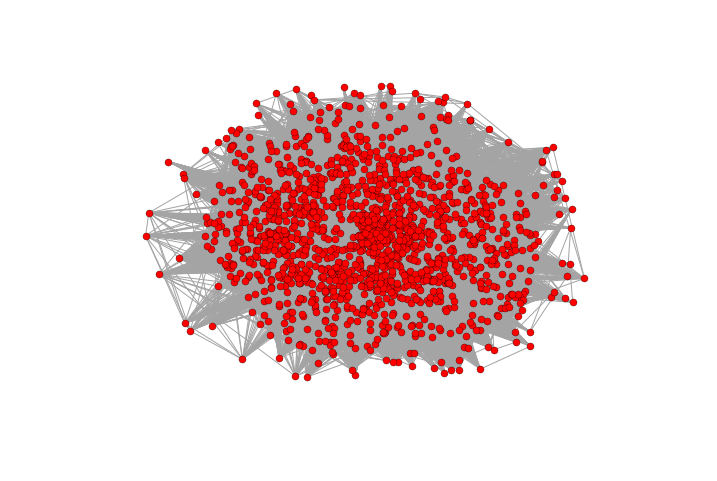

In [20]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(review_network, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

In [22]:
pickle.dump(review_network, open('review_network.txt', 'w'))  #save our network graph to be retrieved later


In [23]:
network = pickle.load(open('review_network.txt'))


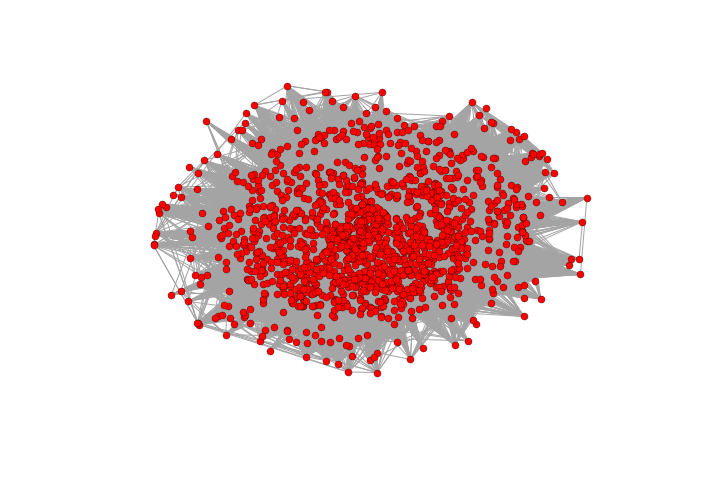

In [24]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(network, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

In [57]:
import time

t1= time.time()
print get_recommendation('bpt8aaamzEe09UxWSrcUVQ', ON_businesses)
print time.time()-t1

[('hYdlasiLgVG_BYTsVKSYnQ', 5), ('8U46CxZHRPuGRdnq2dFW4Q', 5), ('7HVZlM8EtDJE3aXJ3rGE3w', 5), ('-iErUyidzk-c02Od6GDG2w', 5), ('F45vLhAYr-N4uAJPishm9Q', 5), ('3iWbq5QqLIgusVI2-PuUgQ', 5), ('_pmjqKf9iZ6zLPCiLoClYg', 5), ('CJLy9HYMZSC2ytQUO1-f7A', 5), ('kl9uNBM5K6IE1n6Pb7uMMA', 5), ('uNEYV3L3vkRjCzpVzBRBcw', 5)]
54.9930000305


In [92]:


t1= time.time()
top_recommendations =  get_recommendation('ncpnPLtl2_Gz8i4gPIIRpw', ON_businesses, 5)
print time.time()-t1

3
4
3
3
3
4
3
4
3
4
3
5
3
3
3
3
5
4
3
4
1
3
4
2
4
3
1
4
4
1
2
5
5
4
4
4
4
2
5
2
3
5
4
4
4
3
4
4
5
5
3
2
5
3
5
4
3
2
1
3
1
4
2
4
3
3
5
4
4
4
3
1
3
2
4
4
4
2
2
4
4
4
2
4
4
4
5
2
3
2
5
5
3
5
3
3
4
5
5
3
4
1
4
5
4
2
4
2
3
3
4
4
2
2
3
4
4
1
3
3
2
3
3
2
4
4
5
3
4
2
4
5
4
4
3
4
4
4
4
4
3
4
4
5
4
4
5
4
3
2
1
1
5
3
1
3
4
5
5
4
4
4
3
1
5
3
3
3
4
5
2
4
3
4
3
2
3
3
5
2
4
1
2
5
3
5
2
3
3
3
5
4
3
2
4
4
4
4
3
4
3
5
5
4
4
4
4
3
3
4
3
4
4
4
5
3
4
3
4
3
2
3
4
4
4
3
4
3
4
2
4
3
4
5
4
4
5
2
5
3
3
4
5
3
5
5
3
2
4
3
4
3
2
2
4
5
2
5
4
1
4
4
2
4
1
4
5
4
2
3
2
3
4
3
3
1
2
5
3
2
2
4
4
3
3
3
4
5
4
61.5829999447


In [89]:
print_recommendations(top_recommendations)

Delta Waterloo 5
Downtown Crepe cafe 5
King Fish and Chips 5
The Java Garden 5
1001 Nights Shawarma 5
Pizza Prosciutto 5
271 West 5
Rise & Shine Bagels 5
Sogo Cuisine 5
Ausanda Chocolate 5
Golden Hearth Bakery 5.0
Pure Hair Studio 5.0
Instinct Windsports, Inc 5
Thrive Studios 5
The Princess Cinema 5.0
Waterloo Region Museum 5
Breadbaron Sandwiches 4.3
Hot Wheels Tea House 4.3
Public Kitchen & Bar 4.3
WingsUp! 4.3
Montana's Cookhouse 4.3
Wok Wagon 4.3
Bread Heads 4.3
Lisboa Bakery & Grill 4.3
DAVIDsTEA 4.3
Princess Cafe 4.3
Borealis Grille & Bar 4.3
Region of Waterloo International Airport YKF 4.3
Hog Tails Barbeque 4.3
Bourbon St Grill 4.3
Landmark Cinemas 12 Kitchener 4.3
Talize 4.3
Kickoff 4.3
Lotus Tea House 4.3
Deli Banh Mi Givral 4.3
Cafe 1842 4.3
Words Worth Books 4.3
Bhima's Warung 4.3
Bao Sandwich Bar 4
Rolling Pepper Hotpot 4
Fork and Cork Grill 4.0
Korner Kitchen 4
Fresh Burrito Mexican Grill 4
Pho Bistro 4
White Rabbit 4.0
Darlise Cafe 4
A Dish Called Wanda 4
DH Food & Lodgi

In [88]:
def print_recommendations(top_recommendations):
    business_df = pd.read_csv(open('./output/business.csv'))
    for bus, rating in top_recommendations:
        print business_df[business_df.business_id==bus].name.tolist()[0], rating
        print '========================='


In [76]:
def get_recommendation(user_id, city, n=10):
    rating_list = []
    review_df = pd.read_csv(open('./output/reviews.csv'))
    for business_id in city:
        rating = get_prediction(user_id, business_id, review_df)
        rating_list.append((business_id, rating))
    temp_res = sorted(rating_list, key=lambda tup: tup[1])
    temp_res.reverse()
    return temp_res[:n]

In [91]:
def get_prediction(user_id, business_id, review_df):
    review_df = review_df[review_df['BusinessId']==business_id]
    allRatings = []
    friendsRatings = []
    for i in range (len(review_df)):
        stars = review_df.iloc[i].Stars
        allRatings.append(stars)
        if review_df.iloc[i].UserId in friends_list[user_id]:
            friendsRatings.append(stars)
    if allRatings:
        globalAverage = sum(allRatings) / len(allRatings)
    if friendsRatings:
        friendsAverage = sum(friendsRatings) / len(friendsRatings)
        return ((.7*globalAverage)+(.3*friendsAverage))
    if allRatings:
        return globalAverage
    else:
        return None
